## Import Libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set()
np.set_printoptions(suppress=True, precision = 5, linewidth=100) # Just formart the printout to screen for better viewing

## Loading Data

In [2]:
dataset = pd.read_csv("Linear-Regression-Simple-Data.csv")
data = dataset.copy()
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [3]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Defining the dependent and independent variables

In [4]:
y = data["GPA"] # GPA (y) is the dependent variable since it depends on SAT
x = data["SAT"]  # SAT (x1) is the independent variable(s) since it affects the GPA varialbe

In [5]:
# Often it is useful to check the shapes of the features
x.shape

(84,)

In [6]:
# Often it is useful to check the shapes of the features
y.shape

(84,)

## Regression itself
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [7]:
# We start by creating a linear regression object
reg = LinearRegression()

 In order to feed x (independent variable) to sklearn, it should be a 2D array (a matrix)

Therefore, we must reshape it 

#Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

#### reg.fit(x, y)

In [8]:
x_matrix = x.values.reshape(84, 1)
x_matrix.shape

(84, 1)

#### reg.fit(independent variable, dependent variable)

In [9]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)

reg.fit(x_matrix, y)

LinearRegression()

# R-Squared

In [10]:
reg.score(x_matrix, y)

0.40600391479679765

# Coefficients

In [11]:
# This is only the coef of the SAT independent variable since we had only 1
reg.coef_

array([0.00166])

# Intercept

In [12]:
reg.intercept_

0.2750402996602803

# Making predictions

**Let's predic GPA Using the SAT score**

We can achieve this by using the **reg.predict(new_value)

reg.predict(new_value) returns the **prediction** of the linear regression model for a given input value



In [13]:
# Let's predict the GPA of a student with a SAT score of 1740
reg.predict([[1740]])

array([3.15594])

In [14]:
# So the predicted GPA for the student with a SAT score of 1740 is 3.156

In [15]:
# Predicting GPAs for multiple SAT scores simultaneously

sat_scores = pd.DataFrame(data=[1740, 1800, 200, 2000, 2200], columns=["SAT Scores"])
sat_scores

,SAT Scores
0,1740
1,1800
2,200
3,2000
4,2200


In [16]:
reg.predict(sat_scores)

array([3.15594, 3.25528, 0.60618, 3.58642, 3.91755])

In [17]:
sat_scores["Predicted GPA"] = reg.predict(sat_scores)
sat_scores

,SAT Scores,Predicted GPA
0,1740,3.155938
1,1800,3.255279
2,200,0.606178
3,2000,3.586416
4,2200,3.917554


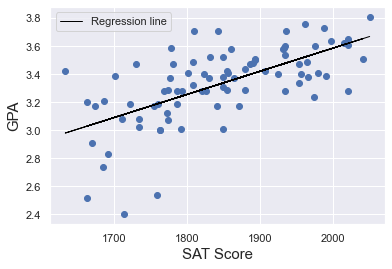

In [18]:
# Create a scatter plot
plt.scatter(x,y)

# Define the regression equation, so we can plot it later
yhat = reg.coef_ * x_matrix + reg.intercept_

plt.ylabel("GPA", fontsize=15)
plt.xlabel("SAT Score", fontsize=15)
fig = plt.plot(x_matrix,yhat, lw=1, c='black', label ='Regression line')
plt.legend()
plt.show()

# Multiple Linear Regression

In [19]:
# Load data
mlr_data_set = pd.read_csv("Multiple-linear-regression.csv")
mlr_data = mlr_data_set.copy()
mlr_data

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83
...,...,...,...
79,1936,3,3.71
80,1810,1,3.71
81,1987,3,3.73
82,1962,1,3.76


### Spliting dependent and independent variables

In [20]:
# There's just one depended variable: 'GPA'
mlr_y = mlr_data['GPA']

# There are two independent variables: 'SAT' and 'Rand 1,2,3'
mlr_x = mlr_data[["SAT", "Rand 1,2,3"]]

In [21]:
# We start by creating a linear regression object

mlr_reg = LinearRegression()

In [22]:
# The whole learning process boils down to fitting the regression
mlr_reg.fit(mlr_x, mlr_y)

LinearRegression()

## R-Squared

In [23]:
# Getting the R-Squared of the regression
mlr_reg.score(mlr_x, mlr_y)

0.40668119528142843

## Coeficient

In [24]:
# Getting the coefficients of the regression
mlr_reg.coef_

array([ 0.00165, -0.00827])

## Intercept

In [25]:
# Getting the intercept of the regression
mlr_reg.intercept_

0.29603261264909486

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [26]:
# Get the shape of x, to facilitate the creation of the Adjusted R^2 metric
mlr_x.shape

(84, 2)

In [27]:
# If we want to find the Adjusted R-squared we can do so by knowing the r2, the # observations, the # features
r2 = mlr_reg.score(mlr_x, mlr_y)
# Number of observations is the shape along axis 0
n = mlr_x.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = mlr_x.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

## Feature selection
Full documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html

In [28]:
from sklearn.feature_selection import f_regression

In [29]:
f_regression(mlr_x, mlr_y)

(array([56.04805,  0.17558]), array([0.     , 0.67629]))

In [30]:
# P-Values is contained in the second array so we need to slice it out
# Since we are more interested in the latter (p-values), we can just take the second array
p_values = f_regression(mlr_x, mlr_y)[1]
p_values

array([0.     , 0.67629])

In [31]:
# For better visualization of the resuls, round up to 3 dp
p_values.round(3)

array([0.   , 0.676])

# Feature selection through Standardization

In [44]:
# There's just one depended variable: 'GPA'
y = mlr_data['GPA']

# There are two independent variables: 'SAT' and 'Rand 1,2,3'
x = mlr_data[["SAT", "Rand 1,2,3"]]

In [45]:
x

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3
2,1760,3
3,1685,3
4,1693,2
...,...,...
79,1936,3
80,1810,1
81,1987,3
82,1962,1


**Import sklearn Standard Scaler**

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
# Create a scaler object

scaler = StandardScaler()
scaler

StandardScaler()

In [48]:
# Fit data to be scaled
# scaling mechanism
# This only calculates and store the mean and SD of each column but does not transforms the imput data

scaler.fit(x)

StandardScaler()

In [49]:
# Transforming the input data
# Tansform each input variable x by [(x - mean)/SD]

x_scaled = scaler.transform(x) 

In [52]:
# Display Scaled Data

x_scaled 

array([[-1.26338, -1.24637],
       [-1.74458,  1.10633],
       [-0.82068,  1.10633],
       [-1.54248,  1.10633],
       [-1.46549, -0.07002],
       [-1.68684, -1.24637],
       [-0.78218, -0.07002],
       [-0.78218, -1.24637],
       [-0.51271, -0.07002],
       [ 0.04548,  1.10633],
       [-1.06128,  1.10633],
       [-0.67632, -0.07002],
       [-1.06128, -1.24637],
       [-1.28263,  1.10633],
       [-0.69557, -0.07002],
       [ 0.25721, -0.07002],
       [-0.8688 ,  1.10633],
       [-1.64834, -0.07002],
       [-0.03151,  1.10633],
       [-0.57045,  1.10633],
       [-0.81105,  1.10633],
       [-1.18639,  1.10633],
       [-1.75421,  1.10633],
       [-1.52323, -1.24637],
       [ 1.23886, -1.24637],
       [-0.18549, -1.24637],
       [-0.56083, -1.24637],
       [-0.23361,  1.10633],
       [ 1.68157, -1.24637],
       [-0.49346, -0.07002],
       [-0.73406, -1.24637],
       [ 0.8539 , -1.24637],
       [-0.67632, -1.24637],
       [ 0.09361,  1.10633],
       [ 0.334

# Feature selection through Standardization

 **Running an initial regression before Feature selection**

In [53]:
reg = LinearRegression()

In [57]:
reg.fit(x_scaled,y)

LinearRegression()

In [58]:
reg.intercept_

3.330238095238095

In [59]:
reg.coef_

array([ 0.17181, -0.00703])

In [67]:
# Creating a simple summary table

summary_table = pd.DataFrame(data=["intercept", "SAT", "Rand 123"], columns=["Feartures"])
summary_table

,Feartures
0,intercept
1,SAT
2,Rand 123


In [68]:
summary_table["Weights"] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [71]:
# The closer a weight is to 0, the lesser it's impact on the regression model
# We can observe that the Rand 123 variable adds little or no statistical significance to our model, so we 
# either remove it or leave it to interact and bais the weights of the model

summary_table

,Feartures,Weights
0,intercept,3.330238
1,SAT,0.171814
2,Rand 123,-0.007030


***NB:**

    In ML, the **intercept** is also refered to as Baised as we often need to adjust our models with some constant. The regression is Baised

## Making predictions with the standardized coefficients (weights)

In [72]:
# Suppose we want to predict the GPA of two students with the following data

new_data = pd.DataFrame(data=[[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [73]:
reg.predict(new_data)

array([295.3998 , 312.58821])

In [74]:
# The GPA is not a valid format because the new input data was not scaled the same way as the training data

In [75]:
# Scaling the new input data to conform to the same scale as the training data

scaled_new_data = scaler.transform(new_data)

In [77]:
# Data is now transformed/scaled

scaled_new_data

array([[-1.39812, -0.07002],
       [-0.43572, -1.24637]])

In [78]:
# Making predictions again

reg.predict(scaled_new_data)

array([3.09051, 3.26414])

In [79]:
# We now have valid GPA figures

## Generate some data we are going to split

In [80]:
# Generating an array data of integers from 1 to 100
a = np.arange(1, 101)
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [81]:
# Generating another array data of integers from 501 to 601

b = np.arange(501, 601)
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518,
       519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536,
       537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554,
       555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572,
       573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590,
       591, 592, 593, 594, 595, 596, 597, 598, 599, 600])

In [95]:
# using
# from sklearn.model_selection import train_test_split

# spliting a into training and testing data (75% training, 25% testing)

train_test_split(a) # splits a into two arrays and performs training on one part and testing on the other

[array([ 30,  66,  86,  39,  15,  54,  79,  51,  34,  92,  67,  76, 100,  85,  24,  89,  58,  18,
         36,  94,   3,  60,  62,  74,  13,  52,  35,  49,  71,  16,  32,  14,  12,  93,  87,  69,
         48,  78,  11,   4,  37,  23,  27,  84,  38,   2,   9,  56,  88,  59,  97,  90,  81,  64,
         42,   1,  10,  80,  21,  31,   5,  19,  72,  28,  63,  77,  91,  65,  99,  17,  29,  96,
         55,  46,  53]),
 array([50, 45, 98,  8, 95, 83, 40, 61, 25, 57, 22, 82, 43, 75, 70, 26, 47, 33, 68,  7, 73, 44, 41,
         6, 20])]

In [96]:
a_train, a_test = train_test_split(a)

In [97]:
a_train.shape, a_test.shape

((75,), (25,))

In [98]:
# We can observe that both arrays are suffle to randomise the values

a_train, a_test

(array([ 12,  82,  46,  95,  22,  85,  80,  73,  25,   6,  75,  42,  76,  56,  52,  51,  36,  26,
         55,  33,  67,  27,  86,  53,   8,  58,  31,   1,  38,  18,   9,  15,  72,  20, 100,  64,
         21,  88,  59,  98,  40,  91,  61,  24,  71,  13,  70,   4,  93,  57,  65,  11,  62,  43,
         45,  19,  99,   3,  83,  54,  16,  32,  23,  48,  79,  44,  94,  69,  89,  35,  68,  14,
         92,  34,  28]),
 array([ 2,  7, 81, 37, 49, 30, 60, 66, 50, 96, 10, 39, 74, 90, 47, 78, 29, 97, 77, 87, 63, 84,  5,
        17, 41]))

In [102]:
# To modify the percentages of training and testing data. we use test_size

a_train, a_test = train_test_split(a, test_size=0.3, random_state=23)

In [103]:
a_train.shape, a_test.shape

((70,), (30,))

In [104]:
a_train, a_test

(array([ 98,  24,   8,  61,  28,  79,  19,  62,  48,  17,  75,  85,  53,  51,  47,  35, 100,  89,
         80,   1,  15,  31,  96,  39,  23,  14,  57,  33,  36,  45,  11,   3,  94,  97,  59,  71,
         44,   2,  66,  37,  16,  93,  60,  34,  20,  58,  63,  42,  49,  22,  87,  65,  70,  76,
         67,  50,  13,  46,   7,  52,  26,  91,  40,  92,  77,  32,  55,  74,  41,  84]),
 array([27, 81, 83, 69, 78, 38,  4, 56, 21, 18, 73, 25, 72, 88, 90, 30, 10, 68, 43, 95, 86, 29,  9,
        12, 64,  5, 54,  6, 82, 99]))

In [105]:
# We can add multiple arrays in our training. Let's add the b array for example

a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.3, random_state=23)

In [106]:
a_train, a_test, b_train, b_test

(array([ 98,  24,   8,  61,  28,  79,  19,  62,  48,  17,  75,  85,  53,  51,  47,  35, 100,  89,
         80,   1,  15,  31,  96,  39,  23,  14,  57,  33,  36,  45,  11,   3,  94,  97,  59,  71,
         44,   2,  66,  37,  16,  93,  60,  34,  20,  58,  63,  42,  49,  22,  87,  65,  70,  76,
         67,  50,  13,  46,   7,  52,  26,  91,  40,  92,  77,  32,  55,  74,  41,  84]),
 array([27, 81, 83, 69, 78, 38,  4, 56, 21, 18, 73, 25, 72, 88, 90, 30, 10, 68, 43, 95, 86, 29,  9,
        12, 64,  5, 54,  6, 82, 99]),
 array([598, 524, 508, 561, 528, 579, 519, 562, 548, 517, 575, 585, 553, 551, 547, 535, 600, 589,
        580, 501, 515, 531, 596, 539, 523, 514, 557, 533, 536, 545, 511, 503, 594, 597, 559, 571,
        544, 502, 566, 537, 516, 593, 560, 534, 520, 558, 563, 542, 549, 522, 587, 565, 570, 576,
        567, 550, 513, 546, 507, 552, 526, 591, 540, 592, 577, 532, 555, 574, 541, 584]),
 array([527, 581, 583, 569, 578, 538, 504, 556, 521, 518, 573, 525, 572, 588, 590, 530, 510, 5